## Introduction to audio data in Python

Assim como outros tipos de dados, os arquivos de áudio vêm em muitos formatos diferentes como:

* mp3, 
* wav,
* m4a, 
* e flac. 

Mas cada um desses formatos tem uma medida padrão de frequência. 

A frequência é medida em quilohertz, mas também é conhecida como kHz ou taxa de amostragem. Assim como um filme mostra 30 imagens por segundo, que nossos cérebros registram como imagens em movimento, a taxa de amostragem de um arquivo de áudio é uma medida do número de blocos de dados por segundo usados para representar um som digital. 

Com um quilohertz igual a mil informações por segundo.

Por exemplo, uma música que você reproduz normalmente terá uma taxa de amostragem de 32 kHz. 
Isso significa 32.000 informações por segundo. Os livros de fala e áudio têm geralmente entre 8 e 16 kHz. Veremos alguns deles mais tarde. E como você deve ter adivinhado, os arquivos de áudio são diferentes dos dados tabulares ou de texto porque você não pode ver imediatamente os dados com os quais está trabalhando. 

Para transformar arquivos de áudio em linguagem falada em algo que possamos ver e manipular, primeiro temos que abrir o arquivo de áudio com o módulo de onda interno do Python. 

Podemos começar com o módulo wave executando o comando import wave.

In [5]:
import wave

In [6]:
good_morning = wave.open("dataset/good-morning.wav","r")

In [7]:
signal_gm = good_morning.readframes(-1)
print(signal_gm[:10])

b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'


Agora, temos um arquivo de áudio, good_morning.wav. 

Ele contém uma pessoa dizendo as palavras bom dia. 

* Para importá-lo, usaremos o método aberto do wave. 
* Agora salvamos o arquivo de áudio .wav de bom dia na variável good_morning no formato de wave_object. No entanto, neste estado, não é muito útil para nós. 
* Para manipulá-lo ainda mais, usaremos o método readframes para converter wave_object em bytes. O -1 significa que queremos ler todas as informações dentro de wave_object. 
* Agora que convertemos o arquivo de áudio em bytes, como eles se parecem? Ok, podemos ver um trecho de toda a onda sonora na forma de bytes. Mas lembre-se de como quilohertz significa milhares de informações por segundo? O arquivo de áudio .wav bom dia tem 48 quilohertz e 2 segundos de duração. 
* 48.000 informações por segundo e 2 segundos de duração equivalem a 96.000 blocos de dados, todos por apenas duas palavras. 

Portanto, se imprimirmos toda a onda sonora na forma de bytes, veremos 96.000 dessas combinações de letras e números. Não se preocupe, se a saída parecer confusa por enquanto, aprenderemos como converter esses bytes em algo mais útil em breve.

## Converting sound wave bytes to integers

Para tornar nossos dados de áudio mais úteis, vamos convertê-los da forma de bytes para inteiros. 

Para fazer isso, usaremos o NumPy. 

NumPy é uma biblioteca Python numérica cheia de funções úteis. 
* Primeiro, vamos importá-lo.
* Então, o método NumPy que usaremos para converter nossos bytes em inteiros é frombuffer. frombuffer transforma uma série de dados em uma matriz unidimensional de um tipo de dados especificado. 
* Como soundwave_gm é um array de dados, podemos passá-lo para frombuffer como o primeiro parâmetro. 
* E então podemos definir o parâmetro dtype para o tipo de dados que gostaríamos de obter. 
* Existem vários tipos de dados que podemos passar, mas para o nosso caso, int16 é o que estamos procurando. 


In [8]:
import numpy as np

In [11]:
good_morning = wave.open("dataset/good-morning.wav","r")
soundwave_gm = good_morning.readframes(-1)
signal_gm = np.frombuffer(soundwave_gm, dtype='int16')

In [12]:
signal_gm[:10]

array([ -3,  -5,  -8,  -8,  -9, -13,  -8, -10,  -9, -11], dtype=int16)

Ok, sabemos que nossa onda sonora de bom dia tem uma frequência de 48 kilohertz. Mas e se não o fizéssemos? Para encontrá-lo, podemos dividir o comprimento da matriz de objetos de onda pela duração da onda sonora em segundos. Mas o módulo de onda do Python tem uma maneira programática. 

Chamar get frame rate em um objeto de onda sonora retornará sua taxa de frames. Vamos usá-lo em nosso objeto de onda bom dia. 

O método retorna o número que esperávamos, 48.000 ou 48 quilohertz. 

Podemos usar esta variável de taxa de quadros para mais uma coisa que será útil para visualizar nossas ondas sonoras mais tarde. 

Dividindo o número de itens na matriz de ondas sonoras pela taxa de quadros, podemos obter a duração do nosso arquivo de áudio.

    duração_audio(segundos) = tamanho do objeto(array) / frequencia(Hz)

In [13]:
framerate_gm = good_morning.getframerate()
framerate_gm

48000

Com esse valor, podemos aproveitar o método linspace do NumPy para descobrir o registro de data e hora em que ocorre cada valor de onda sonora. 

O método linspace leva start, stop e num inteiros como parâmetros. 

Chamá-lo retornará um número de valores uniformemente espaçados entre o início e o fim. 

In [14]:
np.linspace(start=1, stop=10, num=10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [15]:
time_gm = np.linspace(start=1, 
            stop=len(soundwave_gm)/framerate_gm, 
            num=len(soundwave_gm))

time_gm

array([ 1.        ,  1.00001883,  1.00003767, ..., 10.41596233,
       10.41598117, 10.416     ])

## Visualizing sound waves

Para visualizar o que estamos criando, vamos trazer outra onda sonora, boa tarde. 

Isso destacará a diferença entre duas ondas sonoras semelhantes e configurará a intuição para o resto do curso. 

Os arquivos de áudio de bom dia e boa tarde têm 48 kHz ou 48.000 quadros por segundo. 

In [16]:
import matplotlib.pyplot as plt

In [31]:
good_morning = wave.open("dataset/good-morning.wav","r")
soundwave_gm = good_morning.readframes(-1)
soundwave_gm = np.frombuffer(soundwave_gm, dtype='int16')


good_afternoon = wave.open("dataset/good-afternoon.wav","r")
soundwave_ga = good_afternoon.readframes(-1)
soundwave_ga = np.frombuffer(soundwave_ga, dtype='int16')


In [32]:
framerate_gm = good_morning.getframerate()
framerate_ga = good_afternoon.getframerate()

In [33]:
time_gm = np.linspace(start=1, 
            stop=len(soundwave_gm)/framerate_gm, 
            num=len(soundwave_gm))

time_ga = np.linspace(start=1, 
            stop=len(soundwave_ga)/framerate_ga, 
            num=len(soundwave_ga))

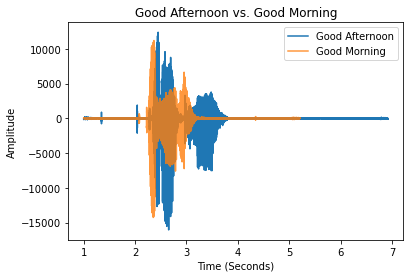

In [36]:
plt.title("Good Afternoon vs. Good Morning")
plt.xlabel("Time (Seconds)")
plt.ylabel("Amplitude")

plt.plot(time_ga, soundwave_ga, label = "Good Afternoon")
plt.plot(time_gm, soundwave_gm, label = "Good Morning",alpha=0.8)

plt.legend()
plt.show()